## Earning Based on College Majors

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
       (Using scatter plots)
- How many majors are predominantly male? Predominantly female?
        (Using histograms)
- Which category of majors have the most students?
        (Using bar plots)

In [2]:
#importing the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
#% matplotlib inline

In [4]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0]) #returning the first row
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())
print(recent_grads.info())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [5]:
row_data_count = recent_grads.shape[0]
print('The number of rows is: ',row_data_count)

The number of rows is:  173


In [6]:
recent_grads = recent_grads.dropna(axis = 0)

In [7]:
cleaned_data_count = recent_grads.shape[0]
print('The number of rows in the cleaned dataset is: ', cleaned_data_count)

The number of rows in the cleaned dataset is:  172


## Scatter Plots

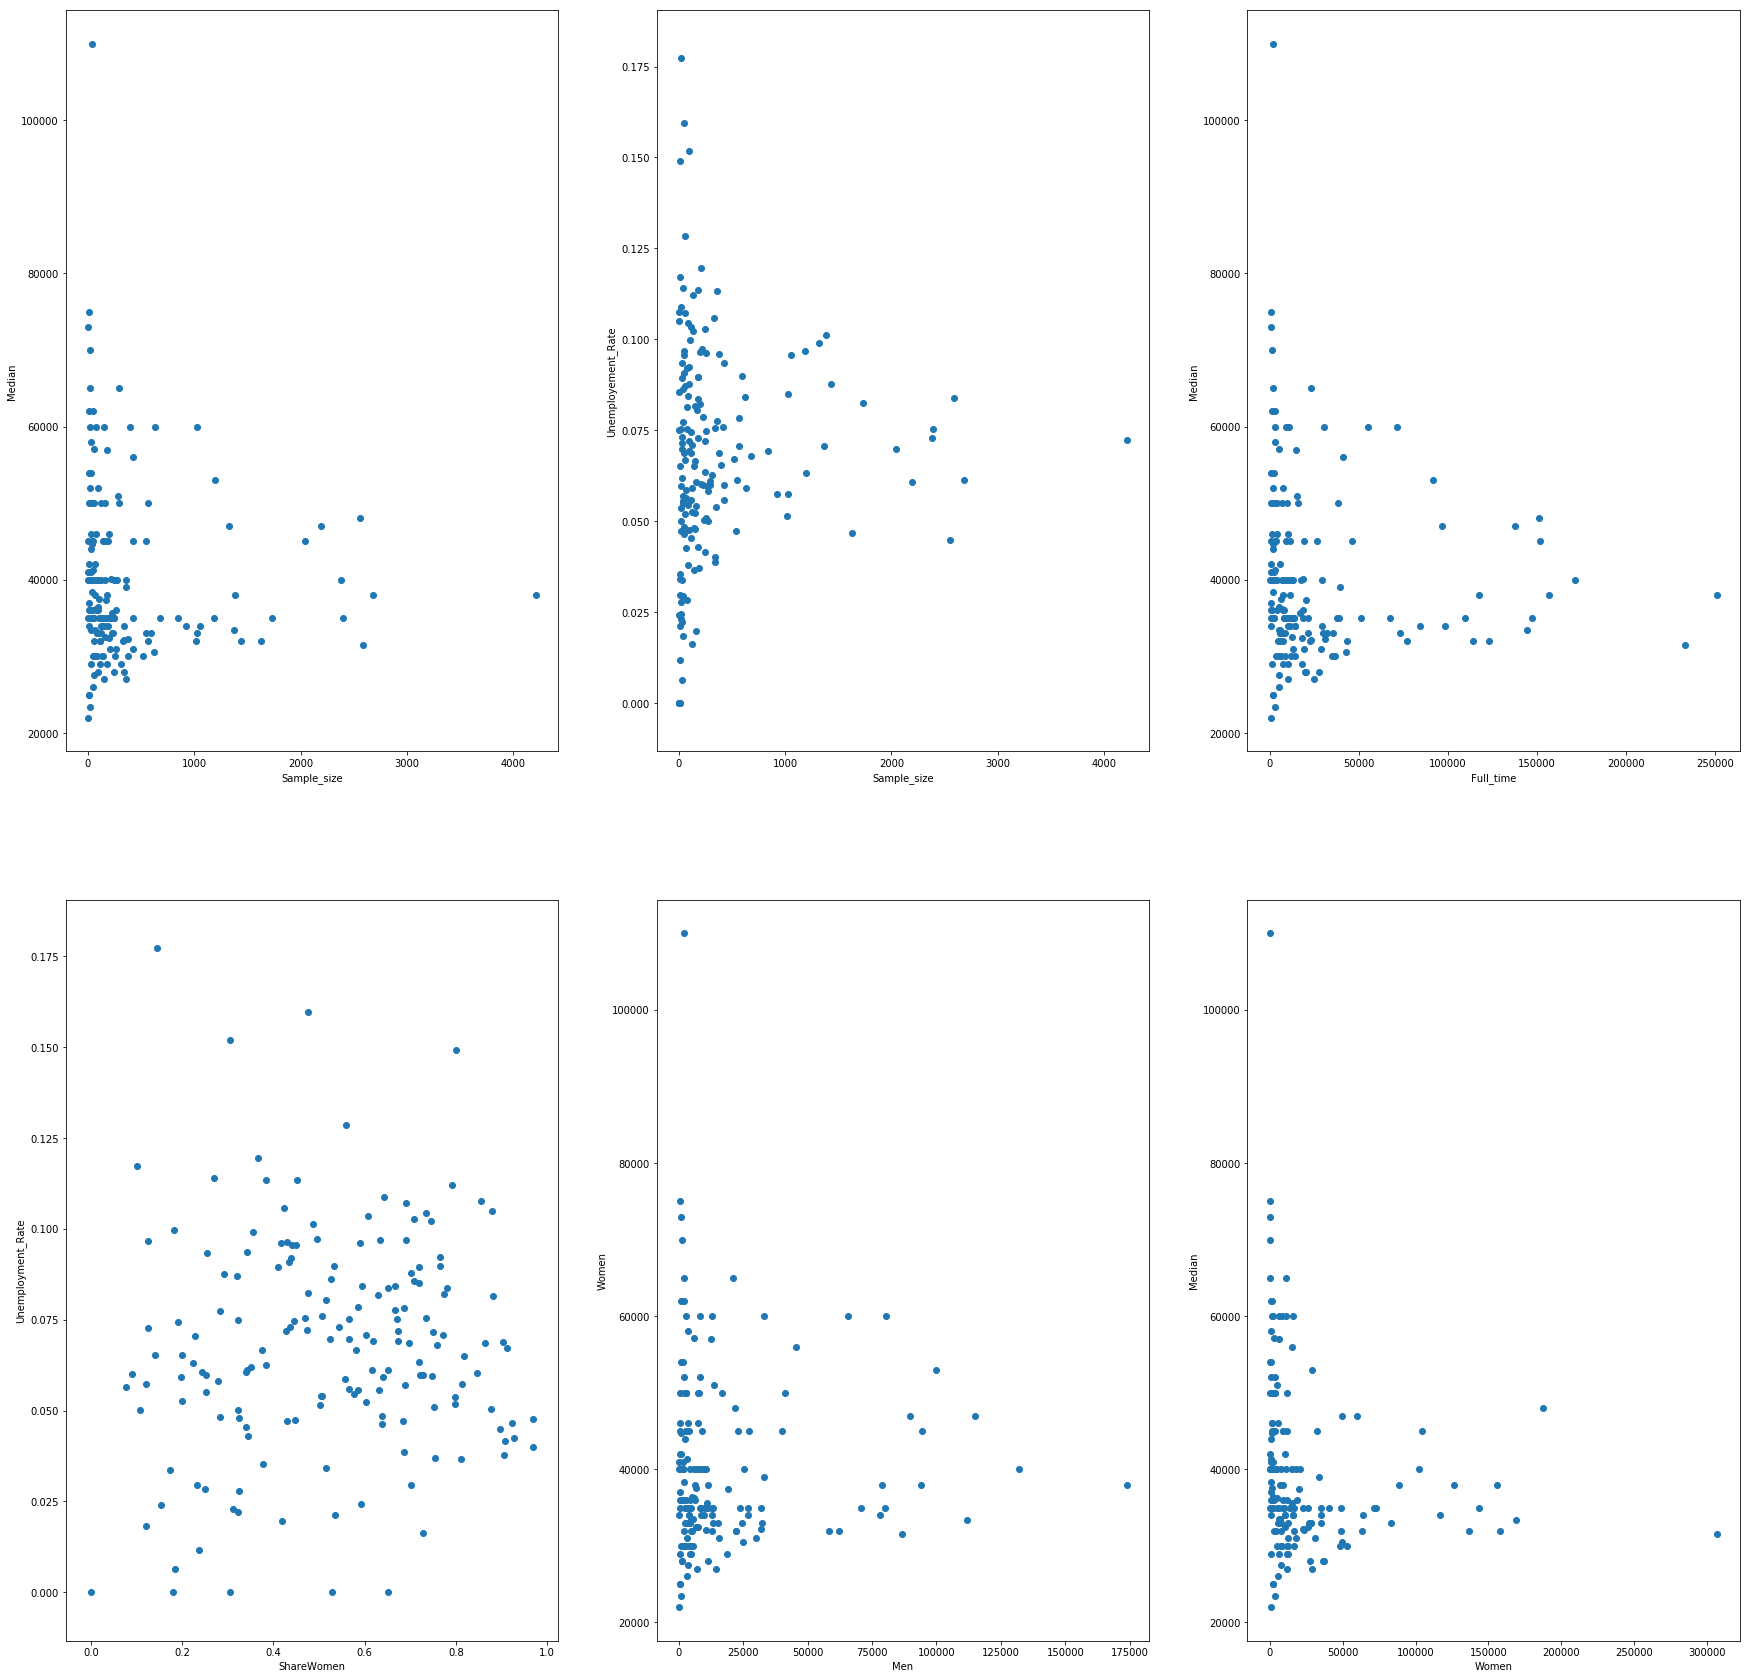

In [9]:
fig = plt.figure(figsize = (30, 30))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

ax1.scatter(recent_grads['Sample_size'], recent_grads['Median'])
ax1.set_xlabel('Sample_size')
ax1.set_ylabel('Median')

ax2.scatter(recent_grads['Sample_size'], recent_grads['Unemployment_rate'])
ax2.set_xlabel('Sample_size')
ax2.set_ylabel('Unemployement_Rate')

ax3.scatter(recent_grads['Full_time'], recent_grads['Median'])
ax3.set_xlabel('Full_time')
ax3.set_ylabel('Median')

ax4.scatter(recent_grads['ShareWomen'], recent_grads['Unemployment_rate'])
ax4.set_xlabel('ShareWomen')
ax4.set_ylabel('Unemployment_Rate')

ax5.scatter(recent_grads['Men'], recent_grads['Median'])
ax5.set_xlabel('Men')
ax5.set_ylabel('Women')

ax6.scatter(recent_grads['Women'], recent_grads['Median'])
ax6.set_xlabel('Women')
ax6.set_ylabel('Median')

plt.savefig('earnings.png')

The scatter plot shows the correlation between the variables.

In the first plot, top left, there is not positive or negetive correlation between the sample size and median. That is, there is no obvious indication that the larger sample size leads to higher median salary.

It is almost the same for the other plots as well. However, in the forth plot, bottom left, the scatter plot shows that there is definately no correlation between the number of women students and unemploeyment rate.

## Histograms

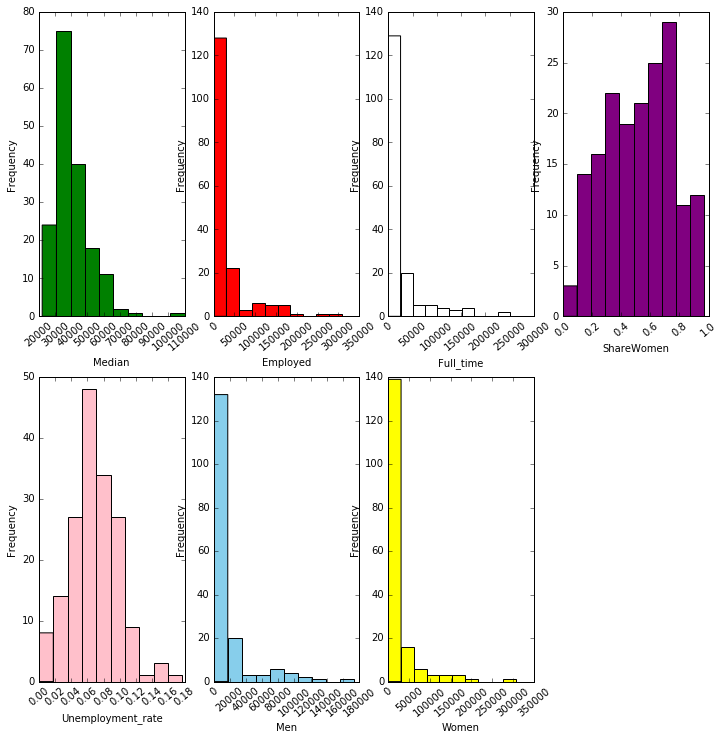

In [52]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
colors = ['blue', 'green', 'red', 'white', 'purple', 'pink', 'skyblue', 'yellow']
fig = plt.figure(figsize=(12,12))
for i in range(1, 8):
    ax = fig.add_subplot(2, 4, i)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=40, color = colors[i])
    ax.set_xlabel(cols[i])
    

Based on the histograms above, it looks like that the majority of the students were women. Also, the most common median salary is $30000 - $40000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7b6f74128>,
      dtype=object)

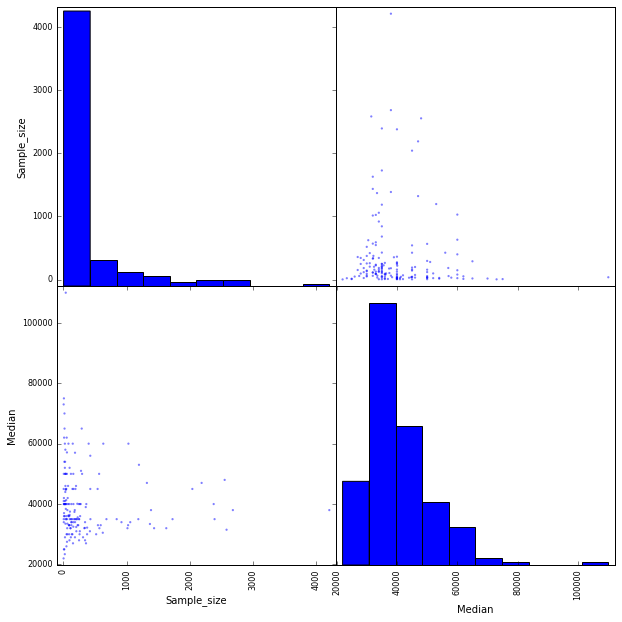

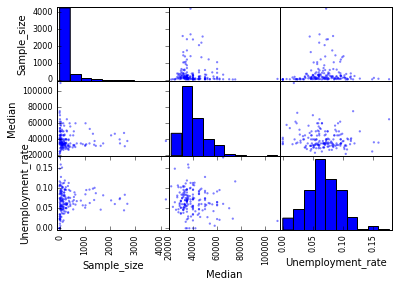

In [54]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 10))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']])

## Bar Plots

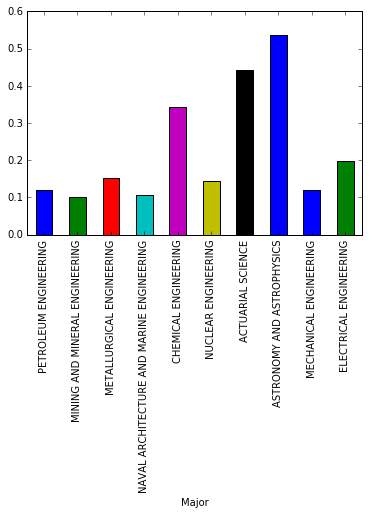

In [57]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)

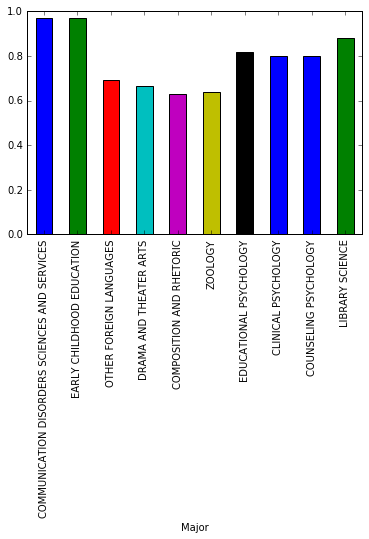

In [59]:
recent_grads.tail(10).plot.bar(x = 'Major', y = 'ShareWomen', legend = False)